# 로지스틱 회귀모델 구축
- 데이터셋 출처 : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud    
  개인정보를 제거하고 주성분 분석(PCA) 처리가 된 데이터입니다.  
  
- 도서 : [MLFlow를 활용한 MLOps](https://www.yes24.com/Product/Goods/106709982)  

##

In [37]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.model_selection import KFold

print("numpy: {}".format(np.__version__))
print("pandas: {}".format(pd.__version__))
print("matplotlib: {}".format(matplotlib.__version__))
print("seaborn: {}".format(sns.__version__))
print("sklearn: {}".format(sklearn.__version__))

numpy: 1.26.4
pandas: 1.5.3
matplotlib: 3.8.3
seaborn: 0.13.2
sklearn: 1.4.1.post1


In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
normal = df[df.Class == 0].sample(frac=0.5, random_state=2024).reset_index(drop=True)
anomaly = df[df.Class == 1]

In [7]:
print(f"Normal: {normal.shape}")
print(f"Anomaly: {anomaly.shape}")

Normal: (142158, 31)
Anomaly: (492, 31)


In [3]:
df[df.Class == 0].shape

(284315, 31)

In [8]:
normal_train, normal_test = train_test_split(normal, test_size=0.2, random_state = 2024)

In [9]:
anomaly_train, anomaly_test = train_test_split(anomaly, test_size=0.2, random_state = 2024)

In [10]:
normal_train, normal_validate = train_test_split(normal_train, test_size = 0.25, random_state = 2024)

anomaly_train, anomaly_validate = train_test_split(anomaly_train, test_size = 0.25, random_state = 2024)

In [12]:
x_train = pd.concat((normal_train, anomaly_train))
x_test = pd.concat((normal_test, anomaly_test))
x_validate = pd.concat((normal_validate, anomaly_validate))

In [13]:
y_train = np.array(x_train["Class"])
y_test = np.array(x_test["Class"])
y_validate = np.array(x_validate["Class"])

In [14]:
x_train = x_train.drop("Class", axis=1)
x_test = x_test.drop("Class", axis=1)
x_validate = x_validate.drop("Class", axis=1)

In [16]:
print(f"Training sets:\nx_train: {x_train.shape} y_train: {y_train.shape}")
print(f"\nTesting sets:\nx_test: {x_test.shape} y_test: {y_test.shape}")
print(f"\nValidation sets:\nx_validate: {x_validate.shape} y_validate: {y_validate.shape}")

Training sets:
x_train: (85588, 30) y_train: (85588,)

Testing sets:
x_test: (28531, 30) y_test: (28531,)

Validation sets:
x_validate: (28531, 30) y_validate: (28531,)


In [17]:
scaler = StandardScaler()
scaler.fit(pd.concat((normal, anomaly)).drop("Class", axis=1))
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_validate = scaler.transform(x_validate)

In [19]:
sk_model = LogisticRegression(random_state=None, max_iter=400, solver='newton-cg').fit(x_train, y_train)

In [20]:
eval_acc = sk_model.score(x_test, y_test)

In [21]:
preds = sk_model.predict(x_test)
auc_score = roc_auc_score(y_test, preds)

In [22]:
print(f"Auc Score: {auc_score:.3%}")
print(f"Eval Accuracy: {eval_acc:.3%}")

Auc Score: 84.333%
Eval Accuracy: 99.870%


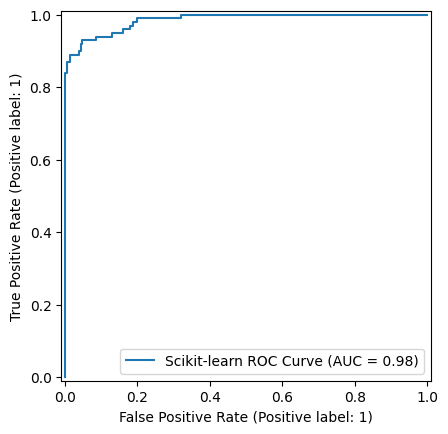

In [38]:
roc_plot = RocCurveDisplay.from_estimator(sk_model, x_test, y_test, name='Scikit-learn ROC Curve')

Text(0.5, 23.52222222222222, 'Predicted')

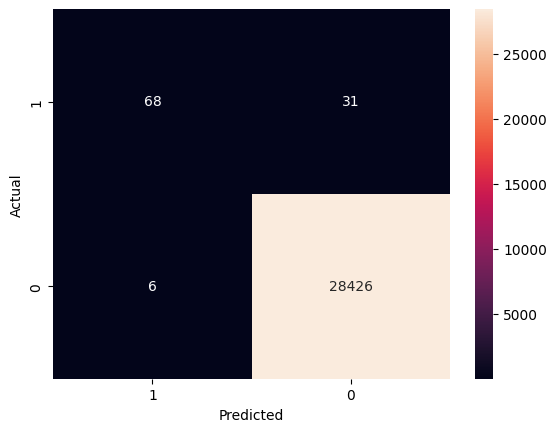

In [44]:
conf_matrix = confusion_matrix(y_test, preds)
ax = sns.heatmap(conf_matrix, annot=True, fmt='g') 
ax.invert_xaxis()
ax.invert_yaxis()
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [45]:
anomaly_weights = [1, 5, 10, 15]

In [46]:
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=2024)

In [48]:
logs = []
for f in range(len(anomaly_weights)):
    fold = 1
    accuracies = []
    auc_scores= []
    for train, test in kfold.split(x_validate, y_validate):
        weight = anomaly_weights[f]
        class_weights = {
            0: 1,
            1: weight
        }
        sk_model = LogisticRegression(random_state=None,
                    max_iter=400,
                    solver='newton-cg',
                    class_weight=class_weights).fit(x_validate[train],y_validate[train])
        print('-'*40)
        print(f"\nfold {fold}\nAnomaly Weight: {weight}")
        eval_acc = sk_model.score(x_validate[test], y_validate[test])
        preds = sk_model.predict(x_validate[test])
        
        try:
            auc_score = roc_auc_score(y_validate[test], preds)
        except:
            auc_score = -1
        
        print("AUC: {}\neval_acc: {}".format(auc_score, eval_acc))
        accuracies.append(eval_acc)
        auc_scores.append(auc_score)
        log = [sk_model, x_validate[test], y_validate[test], preds]
        logs.append(log)
        fold = fold + 1
    print("\nAverages: ")
    print("Accuracy: ", np.mean(accuracies))
    print("AUC: ", np.mean(auc_scores))
    print("Best: ")
    print("Accuracy: ", np.max(accuracies))
    print("AUC: ", np.max(auc_scores))

----------------------------------------

fold 1
Anomaly Weight: 1
AUC: 0.8
eval_acc: 0.9985982127212195
----------------------------------------

fold 2
Anomaly Weight: 1
AUC: 0.8567910541525318
eval_acc: 0.9982474588152822
----------------------------------------

fold 3
Anomaly Weight: 1
AUC: 0.8179179195189047
eval_acc: 0.9980722046968104
----------------------------------------

fold 4
Anomaly Weight: 1
AUC: 0.8682452129973255
eval_acc: 0.9987732211706976
----------------------------------------

fold 5
Anomaly Weight: 1
AUC: 0.8528532875621686
eval_acc: 0.9989484752891693

Averages: 
Accuracy:  0.9985279145386358
AUC:  0.8391614948461861
Best: 
Accuracy:  0.9989484752891693
AUC:  0.8682452129973255
----------------------------------------

fold 1
Anomaly Weight: 5
AUC: 0.8748241603657465
eval_acc: 0.9987734361310671
----------------------------------------

fold 2
Anomaly Weight: 5
AUC: 0.9515893956527202
eval_acc: 0.9980722046968104
----------------------------------------

fold

In [49]:
sk_model, x_val, y_val, preds = logs[11]

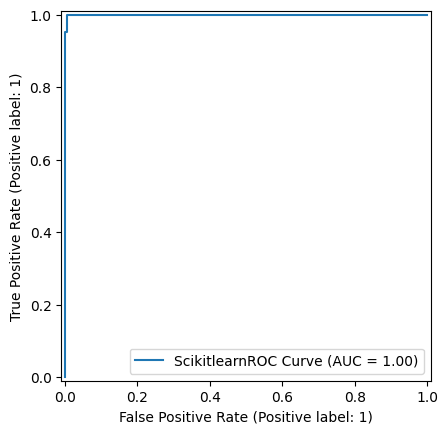

In [50]:
roc_plot = RocCurveDisplay.from_estimator(
    sk_model, x_val, y_val, name="ScikitlearnROC Curve"
)

Text(0.5, 23.52222222222222, 'Predicted')

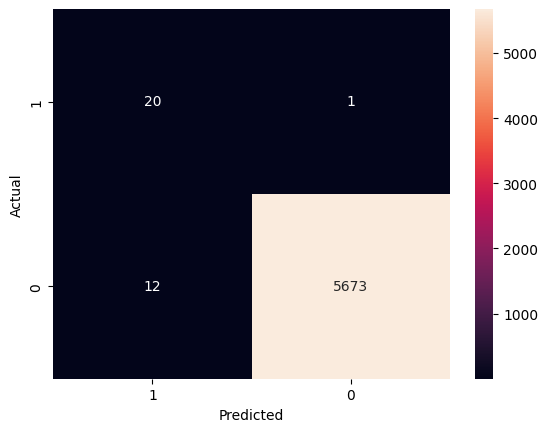

In [51]:
conf_matrix = confusion_matrix(y_val, preds)
ax = sns.heatmap(conf_matrix, annot=True,fmt='g')
ax.invert_xaxis()
ax.invert_yaxis()
plt.ylabel('Actual')
plt.xlabel('Predicted')